In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = '/persisted_storage/datasets/kaggle/black-friday/BlackFriday.csv'
df = pd.read_csv(data_path)
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [3]:
print(f'{df.shape[0]} samples and {df.shape[1]} features in the dataset')

537577 samples and 12 features in the dataset


In [4]:
print('Features:\n{}'.format(df.columns.tolist()))

Features:
['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
df.describe(include='O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


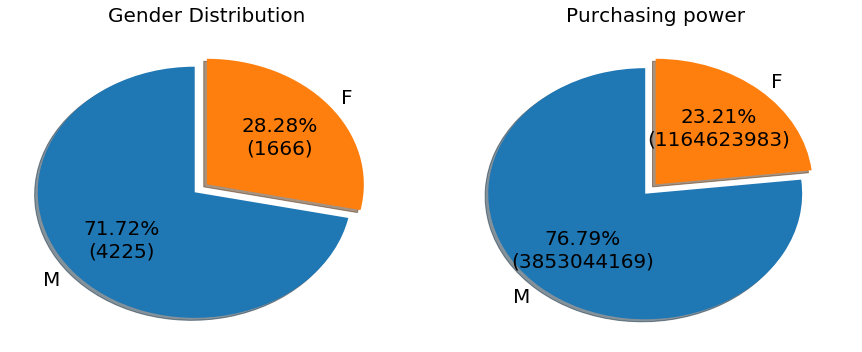

In [8]:
def display_value(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), subplot_kw=dict(aspect=0.8)) # aspect='equal'
# Gender drop duplicate
gender_counts = df.drop_duplicates(subset=['User_ID', 'Gender'])['Gender'].value_counts()
values = gender_counts.values
labels = gender_counts.index
explode = (0.1, 0)
ax[0].pie(values,
          explode=explode,
          autopct=lambda pct: display_value(pct, values),
          labels=labels,
          shadow=True,
          startangle=90,
          textprops={'fontsize':20})
# ax[0].pie(values, explode=explode, autopct='%1.2f%%', labels=labels, shadow=True, startangle=90, textprops={'fontsize':20})
ax[0].set_title('Gender Distribution', fontsize=20)
plt.tight_layout()

gender_purchase = df.groupby('Gender')['Purchase'].sum().sort_values(ascending=False)
explode = (0.1, 0)
values = gender_purchase.values
labels = gender_purchase.index
ax[1].pie(values,
          explode=explode,
          autopct=lambda pct: display_value(pct, gender_purchase),
          labels=labels,
          shadow=True,
          startangle=90,
          textprops={'fontsize':20})
ax[1].set_title('Purchasing power', fontsize=20)
plt.tight_layout()
plt.show()
##### purchasing power
# fig, ax = plt.subplots(figsize=(6, 5))
# gender_purchase = df.groupby('Gender')['Purchase'].sum().sort_values()
# gender_purchase.plot.bar(width=0.4)
# fig_config = {'color':'k', 'fontsize':'12', 'horizontalalignment':'center', 'verticalalignment':'bottom'}
# for index, value in enumerate(gender_purchase):
#     ax.text(index, value, str(value), fig_config)
# ax.set_ylabel('Number', fontsize=18)
# ax.set_xlabel('Gender', fontsize=18)
# ax.set_xticklabels(['Female', 'Male'], rotation='horizontal', fontsize=18)
# plt.show()

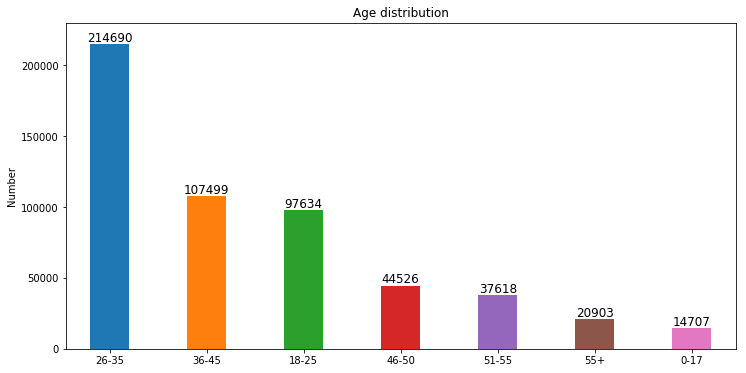

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
age_distribution = df['Age'].value_counts()
age_distribution.plot.bar(width=0.4)
fig_config = {'color':'k', 'fontsize':'12', 'horizontalalignment':'center', 'verticalalignment':'bottom'}
for index, value in enumerate(age_distribution):
    ax.text(index, value, str(value), fig_config)
ax.set_ylabel('Number')
ax.set_ylim(bottom=0, top=230000)
ax.set_title('Age distribution')
ax.set_xticklabels(age_distribution.index, rotation='horizontal')
plt.show()

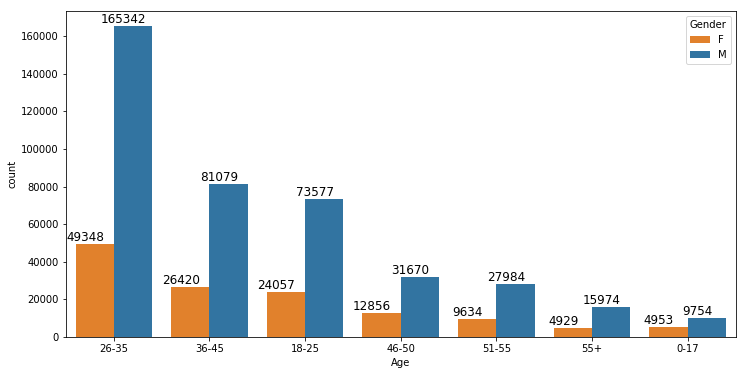

In [10]:
fig= plt.subplots(figsize=(12,6))
ax = sns.countplot(df['Age'], hue=df['Gender'], palette=['C1', 'C0'], order=df['Age'].value_counts(ascending=False).index)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x()+0.1, p.get_height()+50),
                color='k',
                fontsize=12,
                horizontalalignment='center',
                verticalalignment='bottom')

plt.show()

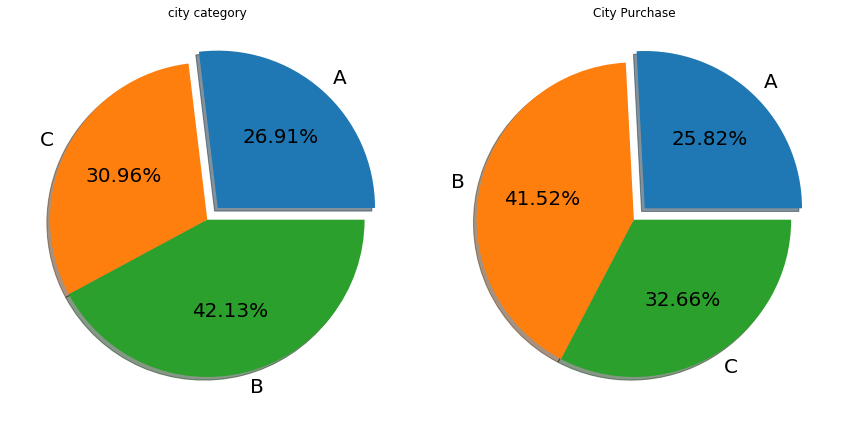

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(aspect='equal'))
city_category = df['City_Category'].value_counts(ascending=True)
values = city_category.values
labels = city_category.index
explode = (0.1, 0, 0)
ax[0].pie(values, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, textprops={'fontsize': 20})
ax[0].set_title('city category')
plt.tight_layout()
# plt.legend(loc='upper right')

# fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect='equal'))
city_purchase = df.groupby('City_Category')['Purchase'].sum()
values = city_purchase.values
labels = city_purchase.index
explode = (0.1, 0, 0)
ax[1].pie(values, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, textprops={'fontsize': 20})
ax[1].set_title('City Purchase')
plt.tight_layout()
# plt.legend(loc='upper right')
plt.show()

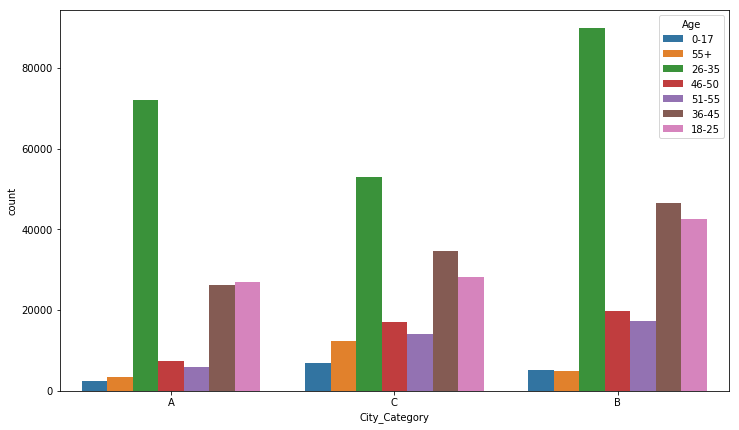

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(df['City_Category'], hue=df['Age'])
plt.show()

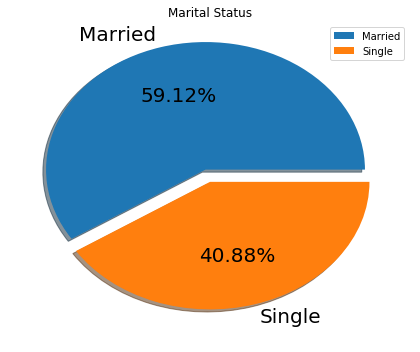

In [13]:
# Marriage status
fig, ax = plt.subplots(figsize=(12, 5), subplot_kw=dict(aspect=0.8))
marital_status = df['Marital_Status'].value_counts()
values = marital_status.values
labels = marital_status.index
labels = ['Married' if i==0 else 'Single' for i in labels]
explode = (0.1, 0)
ax.pie(values, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, textprops={'fontsize': 20})
ax.set_title('Marital Status')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

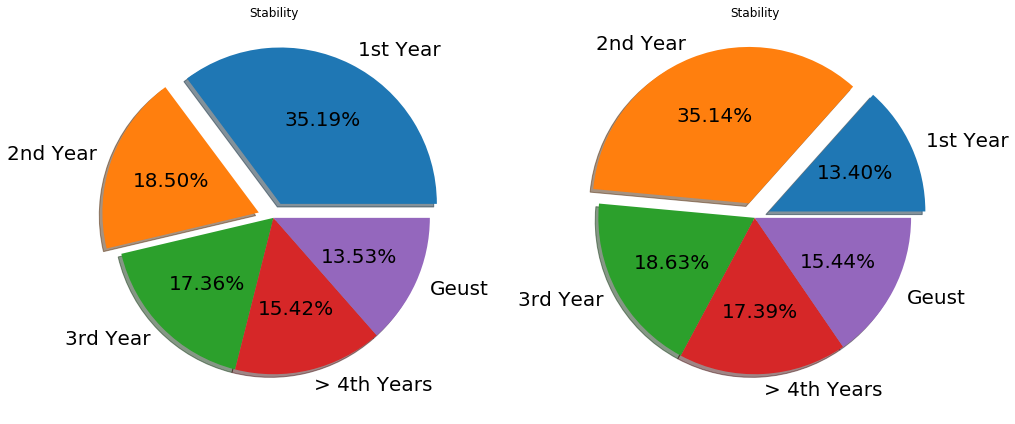

In [14]:
# Stability
fig, ax = plt.subplots(1, 2, figsize=(17, 6), subplot_kw=dict(aspect='equal'))
stability = df['Stay_In_Current_City_Years'].value_counts()
values = stability.values
# labels = stability.index
labels = ['1st Year', '2nd Year', '3rd Year', '> 4th Years', 'Geust']
explode = (0.1, 0.1, 0, 0, 0)
ax[0].pie(values, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, textprops={'fontsize': 20})
ax[0].set_title('Stability')
plt.tight_layout()
# plt.legend(loc='upper right')


# fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect=0.8))
labels = ['1st Year', '2nd Year', '3rd Year', '> 4th Years', 'Geust']
explode = (0.1, 0.1, 0, 0, 0)
stability = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()
values = stability.values
# labels = stability.index
ax[1].pie(values, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, textprops={'fontsize': 20})
ax[1].set_title('Stability')
plt.tight_layout()
# plt.legend(loc='upper right')
plt.show()

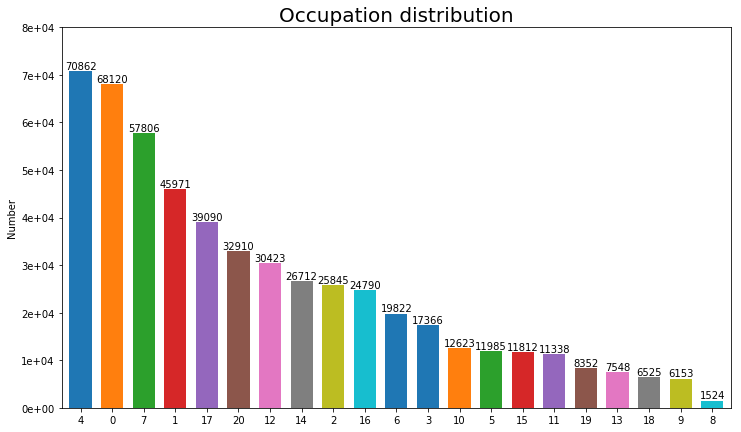

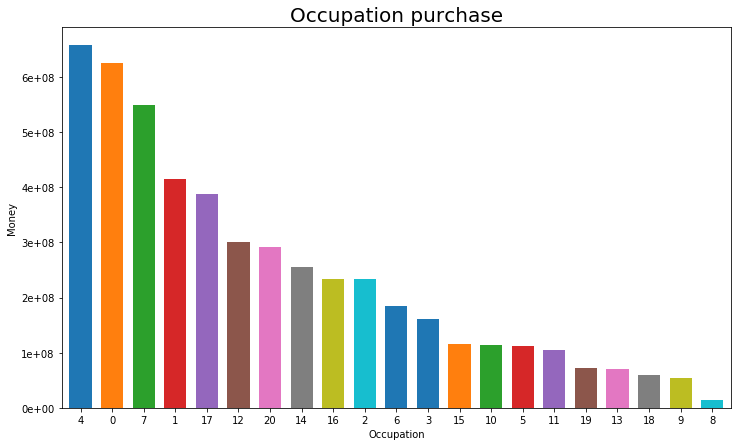

In [15]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(12,7))
occupation_distribution = df['Occupation'].value_counts().sort_values(ascending=False)
occupation_distribution.plot.bar(width=0.7)
fig_config = {'color':'k', 'fontsize':'10', 'horizontalalignment':'center', 'verticalalignment':'bottom'}
for index, value in enumerate(occupation_distribution):
    ax.text(index, value, str(value), fig_config)
ax.set_ylabel('Number')
ax.set_ylim(bottom=0, top=80000)
ax.set_title('Occupation distribution', fontsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))
ax.set_xticklabels(occupation_distribution.index, rotation='horizontal')


fig, ax = plt.subplots(figsize=(12,7))
occupation_purchase = df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False)
occupation_purchase.plot.bar(width=0.7)
# fig_config = {'color':'k', 'fontsize':'10', 'horizontalalignment':'center', 'verticalalignment':'bottom'}
# for index, value in enumerate(occupation_purchase):
#     ax.text(index, value, str(value), fig_config)
ax.set_ylabel('Money')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))
ax.set_title('Occupation purchase', fontsize=20)
ax.set_xticklabels(occupation_purchase.sort_values(ascending=False).index, rotation='horizontal')
plt.show()

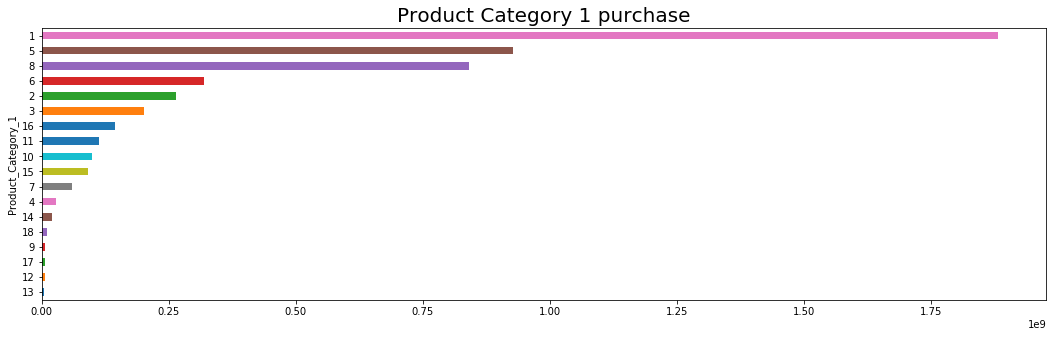

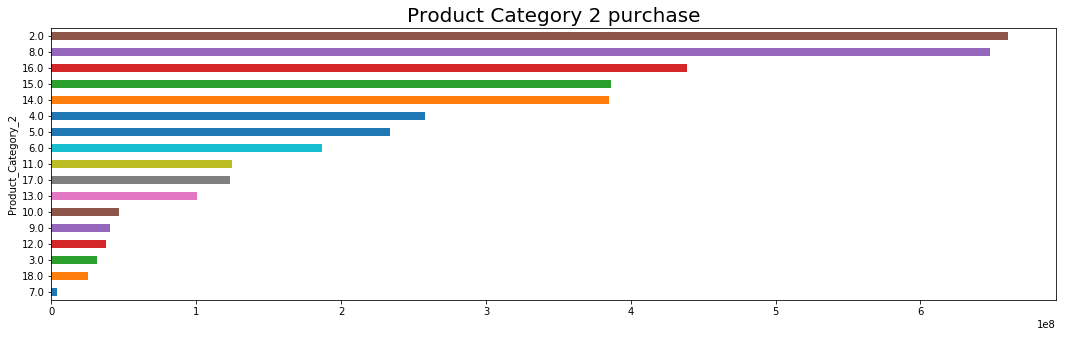

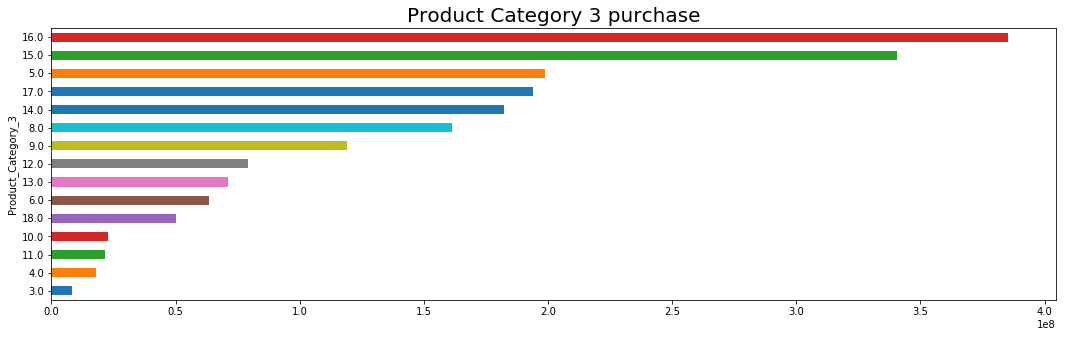

In [16]:
# Products
fig, ax = plt.subplots(figsize=(18,5))
product_1_purchase = df.groupby('Product_Category_1')['Purchase'].sum().sort_values()
product_1_purchase.plot.barh()
ax.set_title('Product Category 1 purchase', fontsize=20)

fig, ax = plt.subplots(figsize=(18,5))
product_2_purchase = df.groupby('Product_Category_2')['Purchase'].sum().sort_values()
product_2_purchase.plot.barh()
ax.set_title('Product Category 2 purchase', fontsize=20)

fig, ax = plt.subplots(figsize=(18,5))
product_3_purchase = df.groupby('Product_Category_3')['Purchase'].sum().sort_values()
product_3_purchase.plot.barh()
ax.set_title('Product Category 3 purchase', fontsize=20)

plt.show()

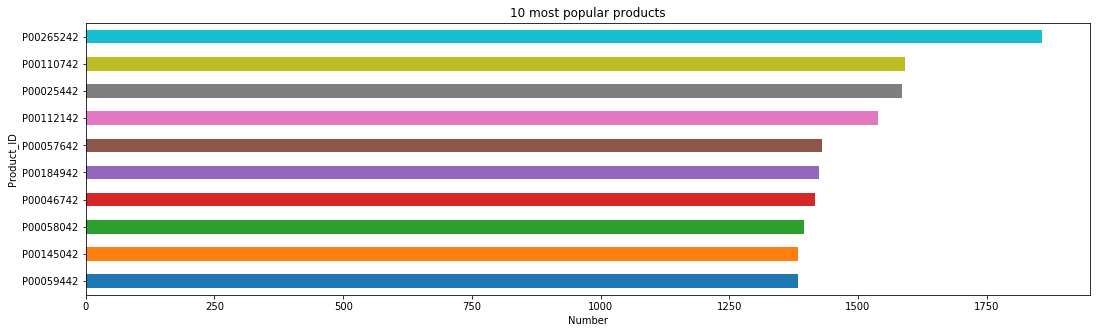

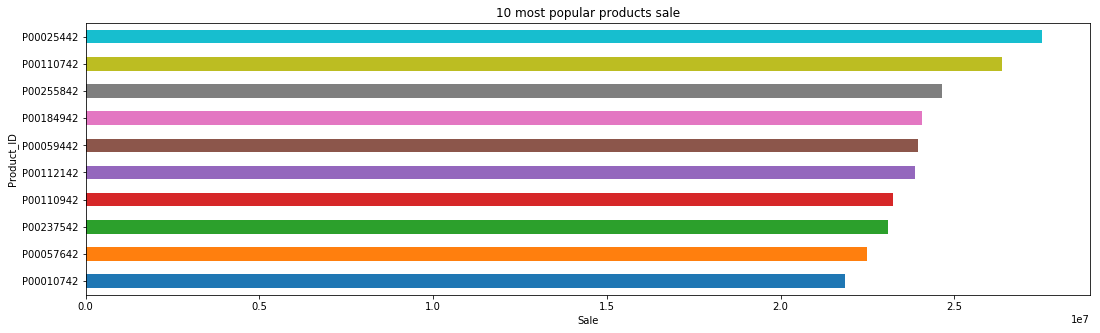

In [17]:
fig, ax = plt.subplots(figsize=(18,5))
popular_10 = df.groupby('Product_ID')['Purchase'].count().nlargest(10).sort_values()
popular_10.plot.barh()
ax.set_title('10 most popular products')
ax.set_xlabel('Number')

fig, ax = plt.subplots(figsize=(18,5))
popular_10_sale = df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values()
popular_10_sale.plot.barh()
ax.set_title('10 most popular products sale')
ax.set_xlabel('Sale')
plt.show()

In [18]:
# df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False)
df['Product_ID'].value_counts().to_frame().head(10)

,Product_ID
P00265242,1858
P00110742,1591
P00025442,1586
P00112142,1539
P00057642,1430
P00184942,1424
P00046742,1417
P00058042,1396
P00059442,1384
P00145042,1384
